# Time-evolving Block Decimation on Finite Spin Chains

In [1]:
import quimb.tensor as qtn

from tebd.hamiltonian import LocalIsingHamiltonian
from tebd.hamiltonian import IsingHamiltonian
from tebd.matrix_product_states import MatrixProductState
from tebd.tebd import run_tebd
from tebd.tebd import TEBD

In [2]:
d = 2
N = 5
bond_dim = 10

In [3]:
lmda = 0
loc_ham_ising = LocalIsingHamiltonian(N, lmda)
glob_ham_ising = IsingHamiltonian(N, lmda)

In [4]:
loc_ham_ising.hamiltonians[0]

[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]

In [5]:
MPS = MatrixProductState(d=2, N=N, bond_dim=bond_dim)

In [6]:
MPS.data

[Tensor(shape=(2, 10), inds=('k0', 'i0'), tags=oset(['state 1'])),
 Tensor(shape=(10, 2, 10), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
 Tensor(shape=(10, 2, 10), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
 Tensor(shape=(10, 2, 10), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
 Tensor(shape=(10, 2), inds=('i3', 'k4'), tags=oset(['state 5']))]

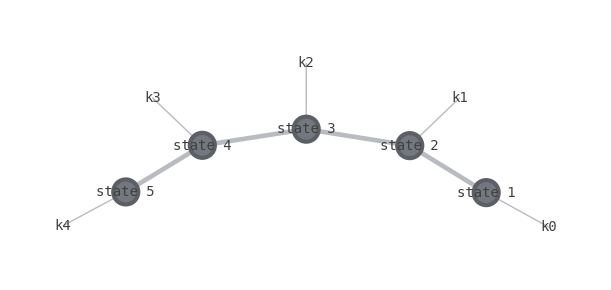

In [7]:
qtn.TensorNetwork(MPS.data).draw()

Make sure the state is normalized.

In [8]:
MPS.norm()

1.0

Look at the density matrix.

In [9]:
rho = MPS.rho()

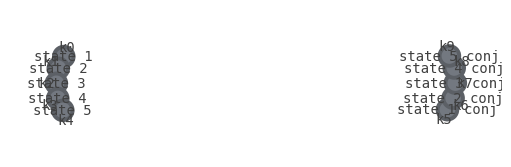

In [10]:
rho.draw(figsize=(5, 5))

Create TEBD object.

In [11]:
tebd_obj = TEBD(MPS, loc_ham_ising, glob_ham_ising, evol_type="imag")

Evolve state.

In [12]:
tau = 0.1
num_iter = 1000
mid_steps = 10

In [13]:
run_tebd(tebd_obj, tau, num_iter, mid_steps)

Iteration: 0 of 1000, energy: 3.949909871200756
Iteration: 10 of 1000, energy: 0.6998297249744183
Iteration: 20 of 1000, energy: -0.0036537030721942483
Iteration: 30 of 1000, energy: 4.48165526103321e-05
Iteration: 40 of 1000, energy: 8.58366277854683e-07
Iteration: 50 of 1000, energy: -7.032307123821732e-06
Iteration: 60 of 1000, energy: -1.811418956534172e-07
Iteration: 70 of 1000, energy: -3.3528894721791183e-09
Iteration: 80 of 1000, energy: -9.933660464195022e-11
Iteration: 90 of 1000, energy: -3.9764741127584096e-11
Iteration: 100 of 1000, energy: -3.866302559223794e-11
Iteration: 110 of 1000, energy: -3.864356521628066e-11
Iteration: 120 of 1000, energy: 1.620420048248532e-09
Iteration: 130 of 1000, energy: 3.0836854485386183e-09
Iteration: 140 of 1000, energy: 0.001995831938010695
Iteration: 150 of 1000, energy: 0.18238274008729957
Iteration: 160 of 1000, energy: 0.8198499564004371
Iteration: 170 of 1000, energy: 2.0239497330102427
Iteration: 180 of 1000, energy: 1.233723533407